**Exercícios de Aprendizado Supervisionado**

In [2]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score


**Download Dataset** - [Crop recommendation data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV)

O dataset **Crop Recommendation Data** contém um total de 1697 amostras, referente as características de solo e condições ambientais para o crescimento de diversas culturas.

Os dados estão estruturados nas seguintes colunas:
N (Nitrogênio): Quantidade de nitrogênio no solo.

*   P (Fósforo): Quantidade de fósforo no solo
*   K (Potássio): Quantidade de potássio no solo
*   temperature (Temperatura): Temperatura ambiente em graus Celsius
*   humidity (Umidade): Umidade relativa do ar em porcentagem
ph: Valor de pH do solo
*   rainfall (Precipitação): Quantidade de precipitação em mm
*   label: A cultura recomendada para plantio, com base nas condições descritas


**Importante:** em *label*, temos os rótulos (classes) que representam diferentes culturas agrícolas: Rice (Arroz), Maize (Milho), Soyabeans (Soja), Beans (Feijão), Peas (Ervilhas), Groundnuts (Amendoins), Cowpeas (Feijão-caupi), Banana, Mango (Manga), Grapes (Uvas), Watermelon (Melancia), Apple (Maçã), Orange (Laranja), Cotton (Algodão) e Coffee (Café)

**Exercício 1 – Leitura Dataset**

Realize a leitura dos dados e exiba as informações gerais do dataset

Exiba quantas amostras existem por classe (label)


In [3]:
df = pd.read_csv('dataset.csv')

df.info() #Informações gerais sobre o dataset
df.head() #Visualização das primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**Exercício 2 – Preparação dos Dados, divisão treinamento e testes**

Realize a divisão dos dados em treinamento e testes

In [4]:
from sklearn.neighbors import KNeighborsClassifier

drop_null = df.dropna()
drop_null.head()

X = drop_null.drop('label', axis=1)
y = drop_null['label']


# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Exercício 3 – Treinamento do Modelo (pode ser o K-NN ou Decision Tree)**

Escolha um algoritmo da biblioteca Scikit-learn que seja adequado para treinar um modelo de recomendação de plantio a partir das variaveis presentes no conjunto de dados.

**Utilizando Decision Tree**

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar o classificador com uma semente para reprodutibilidade
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred_decision_tree = clf.predict(X_test)

**Utilizando KNN**

In [6]:
k = 3 #Número de vizinhos próximos

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

**Exercício 4 – Avaliar o Modelo**

Utilize a métrica adequada para avaliar o modelo a partir dos dados de treinamento

### Avaliacao e Plot KNN

A acurácia do KNN é: 0.996078431372549
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        41
       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        39
       beans       0.96      1.00      0.98        45
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        39
     cowpeas       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        32
  groundnuts       1.00      1.00      1.00        36
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        36
        peas       1.00      0.94      0.97        35
        rice       1.00      1.00      1.00        29
  watermelon       1.00      1.00      1.00        26

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.

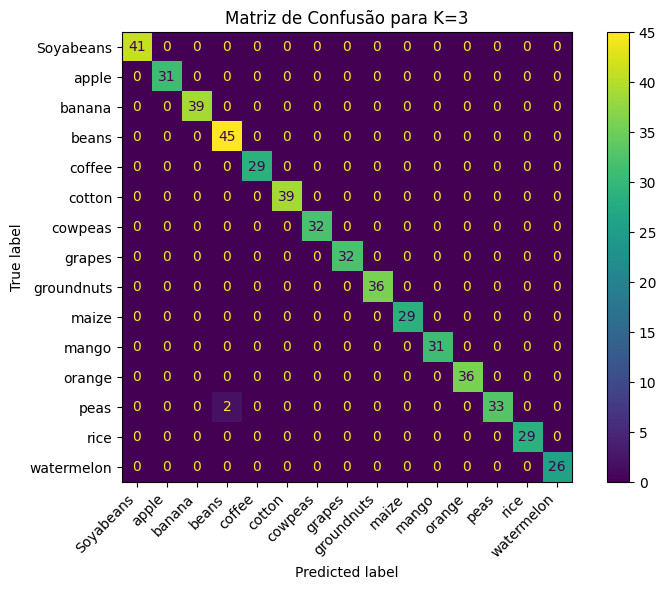

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Criando um LabelEncoder e ajustando aos valores únicos de y_test
label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Treina o LabelEncoder com os rótulos verdadeiros

# Exibir a matriz de confusão corretamente
disp = ConfusionMatrixDisplay(
  confusion_matrix=confusion_matrix(y_test, y_pred_knn),
  display_labels=label_encoder.classes_  # Aqui usamos o objeto instanciado
)

# Cria a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))  # ajuste a figura conforme necessário

# Plota a matriz de confusão
disp.plot(ax=ax)

# Rotaciona os rótulos no eixo X
plt.xticks(rotation=45, ha='right')

# Define o título
plt.title(f'Matriz de Confusão para K={k}')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibir a acurácia
print("A acurácia do KNN é:", accuracy_score(y_test, y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))

### Avaliacao e Plot Arvore de Decisao

Acurácia da arvore: 0.8549019607843137


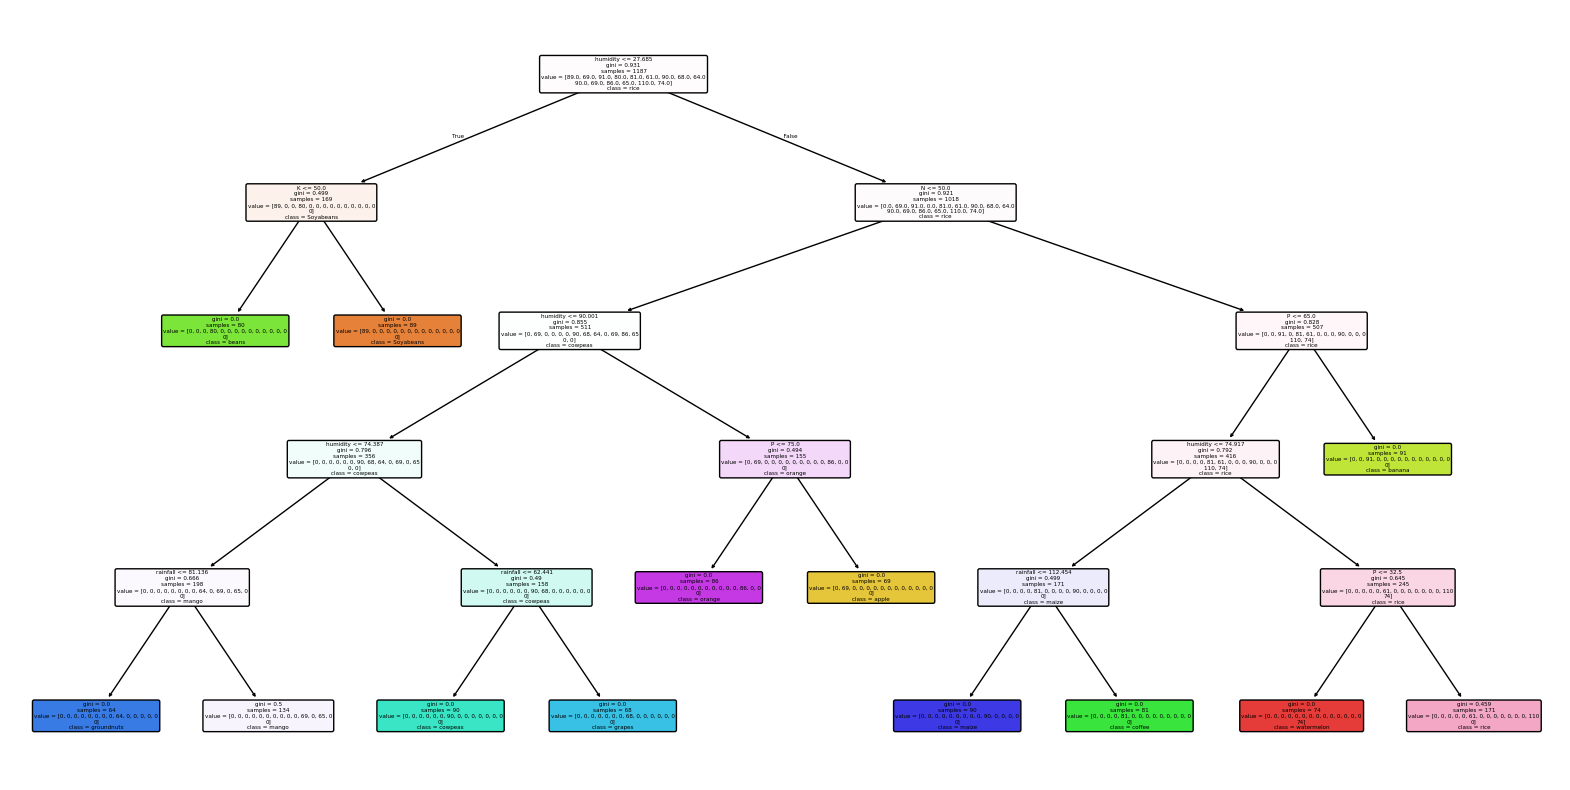

In [8]:
# Visualizar a árvore de decisão em forma de grafico
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Acurácia da arvore:", accuracy)

# Define o tamanho da figura para melhor visualização
plt.figure(figsize=(20,10))

# Plota a árvore de decisão
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)

# Exibe o gráfico
plt.show()